<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/bt(03042023)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()


169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255

x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_test = to_categorical(y_test, 100)
y_train=to_categorical(y_train,100)

model=Sequential()
model.add(Dense(2000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 100)               200100    
                                                                 
Total params: 6,346,100
Trainable params: 6,346,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense

# Load MNIST dataset
(x_train , y_train),(x_test, y_test) = cifar100.load_data()

# Reshape and normalize train images
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32') / 255

# Convert train labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Create the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128)

test_loss, test_acc = model.evaluate(x_test, y_test )
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
391/391 [==============================] - 14s 34ms/step - loss: 4.2570 - accuracy: 0.0658
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 3.8098 - accuracy: 0.1215
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 3.6614 - accuracy: 0.1504
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 3.5655 - accuracy: 0.1670
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 3.4968 - accuracy: 0.1799
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 3.4398 - accuracy: 0.1896
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 3.3986 - accuracy: 0.1985
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 3.3553 - accuracy: 0.2052
Epoch 9/10
391/391 [==============================] - 14s 35ms/step - loss: 3.3215 - accuracy: 0.2130
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 3.5223 

In [ ]:

model.save('model100.h5')

# **MỤC MỚI**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/1/model100.h5')

In [ ]:
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')
model=load_model('/content/drive/MyDrive/1/model100.h5')

Mounted at /content/drive


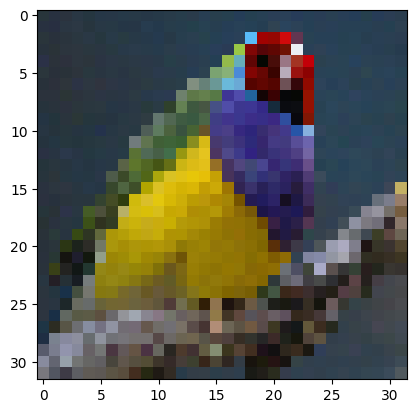

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/bird_small.jpg', target_size=(32,32))
plt.imshow(img)

In [ ]:
import numpy as np

img = img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 1s 778ms/step


array([57])

1/1 [==============================] - 0s 117ms/step
Predicted class: 3


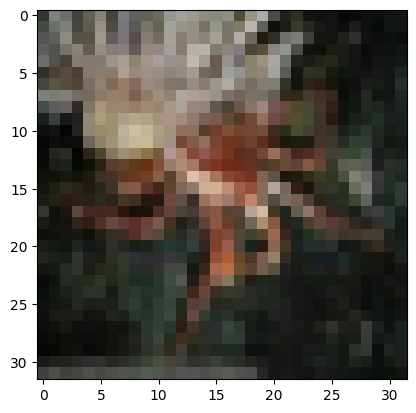

In [11]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import np_utils


(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Make a prediction
prediction = model.predict(x_test[:1])
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

# Display the image
import matplotlib.pyplot as plt
plt.imshow(x_test[100])
plt.show()


FileNotFoundError: ignored

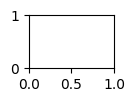

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/1'

for i in range (10):
    plt.subplot(6,5,i+1)
    filename = folder + 'A' + str(i) + 'jpg'
    img1 = imread(filename)
    plt.imshow(img1)
plt.show()
     